# ***Donors Choose Dataset :: Exploratory Data Analysis***

---
### ***`Notebook Contents`***

1. [Problem Statement](#Understand_the_problem)
2. [Importing Libraries](#Libraries_Import)
3. [Reading Data](#Reading_Data)
4. [Data Analysis](#Univariate_Analysis)
    - [Attribute-1 :: School State](#Attribute-1)
    - [Attribute-2 :: Teacher Prefix](#Attribute-2)
    - [Attribute-3 :: Project Grade Category](#Attribute-3)
    - [Attribute-4 :: Project Subject Category](#Attribute-4)
    - [Attribute-5 :: Project Subject Sub-Category](#Attribute-5)
    - [Attribute-6 :: Teachers previously submitted projects](#Attribute-6)
    - [Attribute-7 :: Project Resource Summary](#Attribute-7)
    - [Attribute-8 :: Project Title](#Attribute-8)
    - [Attribute-9 :: Project Essay's](#Attribute-9)
    - [Attribute-10 :: Project Cost](#Attribute-10)

---

### **`Understand_the_problem`**

![flow_diag](flow_diag.PNG)

### **`Libraries_Import`**

In [1]:
import logging
logging.basicConfig(filename="1_Donors_Choose_EDA.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Packages import ####")
    ## Some basic libaries
    import os
    import sys
    import re          # Tutorial about Python regular expressions: https://pymotw.com/2/re/
    import string
    import shutil
    import warnings
    import pickle
    import sqlite3
    from tqdm import tqdm
    from collections import Counter

    ## Data Pre-processing Libraries
    import numpy as np
    import pandas as pd
    from prettytable import PrettyTable               # http://zetcode.com/python/prettytable/ 

    ## Visualization Libraries
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    
    ### Visualization :: Seaborn
    import seaborn as sns
    
    ### Visualization :: Plotly
    from chart_studio import plotly
    import plotly.offline as offline
    import plotly.graph_objs as go
    offline.init_notebook_mode()

    ## NLP
    import nltk
    
    ### NLP :: Stopwords
    from nltk.corpus import stopwords

    ### NLP :: Stemmer and Lemmatizer
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer

    ### NLP :: Word2Vec
    from gensim.models import Word2Vec
    from gensim.models import KeyedVectors

    ### NLP :: Text Featurization libraries
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer

    ## Features Scalers/Standardizers/Normalizers
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
    
    ## Cross-Validation and Data Splitting
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    
    ## ML Algorithms
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
       
    ## Performace Metrics 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score
except ImportError as ie:
    # Output expected ImportErrors
    logging.error(msg=ie.__class__.__name__  + " :: Missing Package --> " + ie.name)
except Exception as exception:
    # Output unexpected Exceptions
    logging.info("#### Exceptions other than ModuleImportError ####")
    logging.log(msg=(exception, False))
    logging.log(msg=exception.__class__.__name__ + " :: " + exception.name)
    
%matplotlib inline

In [2]:
## Some display settings
pd.set_option('display.max_rows',105)
pd.set_option('display.max_columns',50)

In [3]:
## Global Variables
lbl_dict = {'family':'Calibri','size':18,'style':'oblique','color':'k'}
ttl_dict = {'family':'Calibri','size':21,'style':'oblique','color':'magenta'}
wdg_dict = {'linewidth': 1, 'edgecolor': 'black'}

### **`Reading_Data`**

In [4]:
dc_train_df = pd.read_csv('Datasets/train_data.csv',index_col=0).reset_index(drop=True)
dc_res_df = pd.read_csv('Datasets/resources.csv')

In [5]:
print("Number of data points in train data", (format(dc_train_df.shape[0],',d'),dc_train_df.shape[1]))
print('-'*50)
print("The attributes of train data :", dc_train_df.columns.values)

Number of data points in train data ('109,248', 16)
--------------------------------------------------
The attributes of train data : ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
dc_train_df.head(4)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   
2        2016-08-31 12:03:56             Grades 6-8   
3        2016-10-06 21:16:17          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1

In [7]:
print("Number of data points in resource data", (format(dc_res_df.shape[0],',d'),dc_res_df.shape[1]))
print('-'*50)
print("The attributes of resource data :", dc_res_df.columns.values)

Number of data points in resource data ('1,541,272', 4)
--------------------------------------------------
The attributes of resource data : ['id' 'description' 'quantity' 'price']


In [8]:
dc_res_df.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

#### **So, the topic related dataset has around 100k records, whereas, resources dataset has around 1.5 million records. This means that there can be multiple resources for a project.**

### **`Univariate_Analysis`**

#### **Q: How many projects were approved or rejected?**

In [9]:
dc_train_df['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [10]:
tot_subms = dc_train_df.shape[0]
tot_apprv_subms = dc_train_df['project_is_approved'].value_counts()[1]
tot_rejec_subms = dc_train_df['project_is_approved'].value_counts()[0]
apprv_percnt = np.divide((1.0*tot_apprv_subms),tot_subms)*100.0
rejec_percnt = np.divide((1.0*tot_rejec_subms),tot_subms)*100.0

In [11]:
print("Number of projects that are approved for funding --> {:.3f}%".format(apprv_percnt))
print("Number of projects that are not approved for funding --> {:.3f}%".format(rejec_percnt))

Number of projects that are approved for funding --> 84.858%
Number of projects that are not approved for funding --> 15.142%


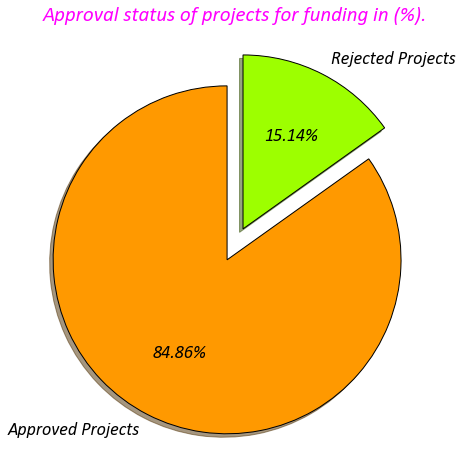

In [12]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10,8))
    plt.pie(x=[apprv_percnt,rejec_percnt],
            autopct=lambda pct : "{:.2f}%".format(pct),
            colors=sns.color_palette('gist_rainbow'),
            shadow=True,
            labels=['Approved Projects','Rejected Projects'],
            explode=[0.1,0.1],
            startangle = 90, 
            wedgeprops = wdg_dict, 
            textprops = lbl_dict)
    plt.title('Approval status of projects for funding in (%).',fontdict=ttl_dict,loc='center')

#### **Clearly, there is a huge gap b/w the approved and rejected projects. This states that majority of the submissions were positively moved ahead with funding.**

### **Attribute-1**
- **`School State`**

In [13]:
## Thanks to Statistics Canada adding the state names :: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
us_states_codes = pd.read_csv('Datasets/US_States_with_codes_abbrev.csv',skiprows=1,usecols=['State','Alpha code']).reset_index(drop=True)

In [14]:
us_states_codes.head()

State Alpha code
0     Alabama         AL
1      Alaska         AK
2     Arizona         AZ
3    Arkansas         AR
4  California         CA

In [15]:
states_apprv_rejec = pd.DataFrame(dc_train_df.groupby(['project_is_approved','school_state'])['id'].count()).reset_index().\
rename(columns={'id':'num_of_projects'})

In [16]:
states_apprv_rejec['state_codes_names'] = states_apprv_rejec['school_state'].\
                                        apply(lambda code: str(us_states_codes[us_states_codes['Alpha code'] == code]['State'].values)\
                                             .replace("[",'').replace("]",'').replace("'",''))

In [17]:
states_apprv_rejec['state_codes_names'] = states_apprv_rejec['school_state']+','+states_apprv_rejec['state_codes_names']

In [18]:
tot_state_subms = dc_train_df['school_state'].value_counts().to_dict()

In [19]:
states_apprv_rejec['tot_subms'] = states_apprv_rejec['school_state'].apply(lambda val: tot_state_subms[val])

In [20]:
states_apprv_rejec['perc_subms'] = states_apprv_rejec[['num_of_projects','tot_subms']].\
                                    apply(lambda row: np.round((row['num_of_projects']/row['tot_subms'])*100.0,2),axis=1)

In [21]:
states_apprv_rejec['state_names'] = states_apprv_rejec['state_codes_names'].apply(lambda row: row.split(",")[-1])

In [22]:
states_apprv_rejec.head()

project_is_approved school_state  num_of_projects state_codes_names  \
0                    0           AK               55         AK,Alaska   
1                    0           AL              256        AL,Alabama   
2                    0           AR              177       AR,Arkansas   
3                    0           AZ              347        AZ,Arizona   
4                    0           CA             2183     CA,California   

   tot_subms  perc_subms state_names  
0        345       15.94      Alaska  
1       1762       14.53     Alabama  
2       1049       16.87    Arkansas  
3       2147       16.16     Arizona  
4      15388       14.19  California

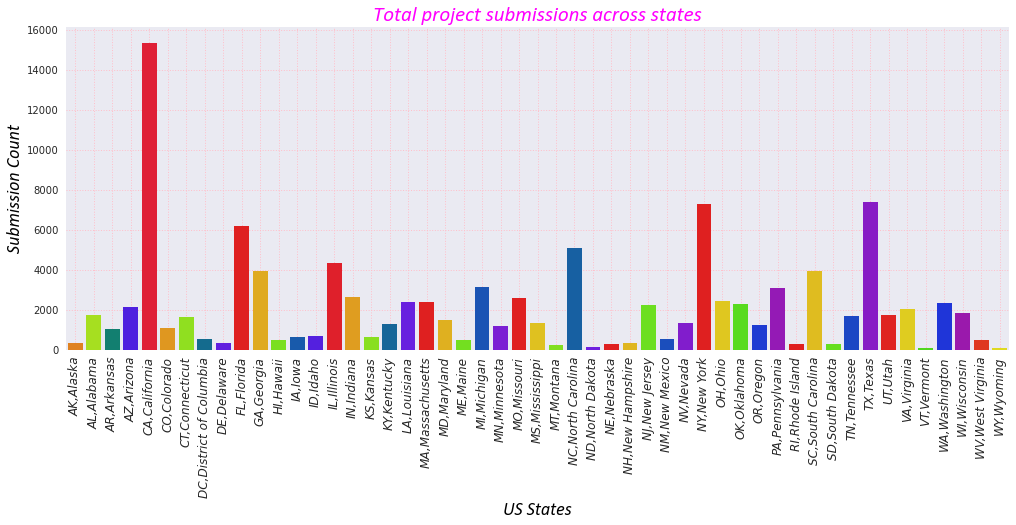

In [23]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0],
                palette='prism')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.title("Total project submissions across states",fontdict=ttl_dict)
    plt.tight_layout(pad=0.5,h_pad=0.3)

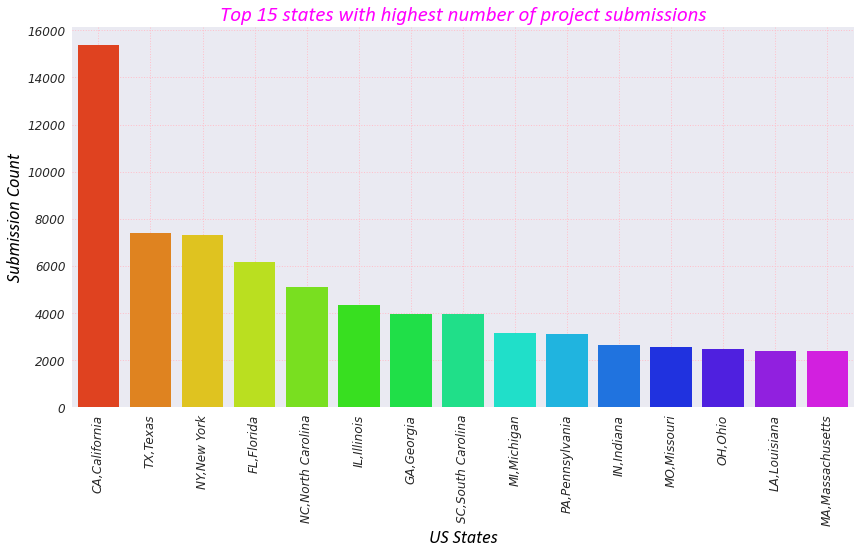

In [24]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=False).iloc[0:15,:],
                palette='gist_rainbow')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.title("Top 15 states with highest number of project submissions",fontdict=ttl_dict)

In [25]:
print("*****Top 15 states with highest number of project submissions*****")
data_tab = states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=False).iloc[0:15,[3,4]]
data_tab.reset_index(drop=True,inplace=True)
x = PrettyTable()
x.field_names = ["Seq.","States/Codes", "Submissions"]
for i in range(0,15,1):
    x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1]])
print(x)

*****Top 15 states with highest number of project submissions*****
+------+-------------------+-------------+
| Seq. |    States/Codes   | Submissions |
+------+-------------------+-------------+
|  0   |   CA,California   |    15388    |
|  1   |      TX,Texas     |     7396    |
|  2   |    NY,New York    |     7318    |
|  3   |     FL,Florida    |     6185    |
|  4   | NC,North Carolina |     5091    |
|  5   |    IL,Illinois    |     4350    |
|  6   |     GA,Georgia    |     3963    |
|  7   | SC,South Carolina |     3936    |
|  8   |    MI,Michigan    |     3161    |
|  9   |  PA,Pennsylvania  |     3109    |
|  10  |     IN,Indiana    |     2620    |
|  11  |    MO,Missouri    |     2576    |
|  12  |      OH,Ohio      |     2467    |
|  13  |    LA,Louisiana   |     2394    |
|  14  |  MA,Massachusetts |     2389    |
+------+-------------------+-------------+


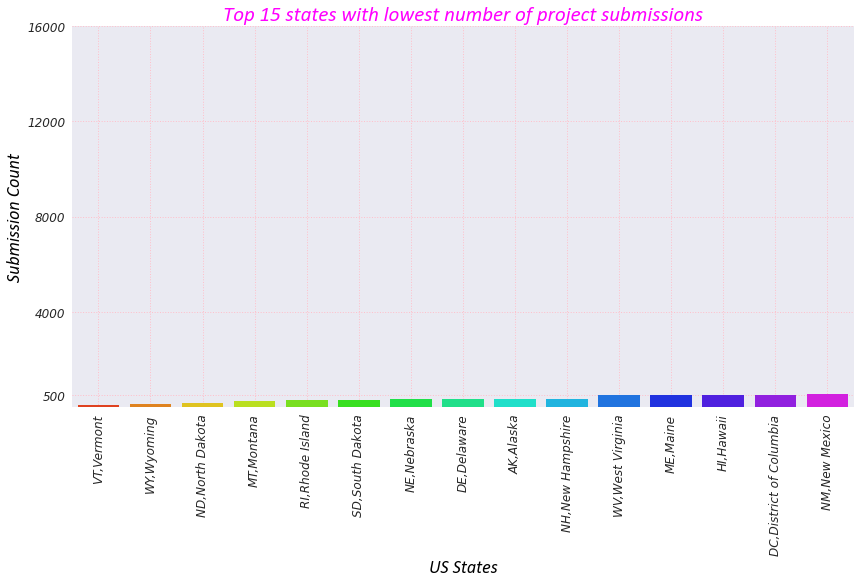

In [26]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=True).iloc[0:15,:],
                palette='gist_rainbow')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.title("Top 15 states with lowest number of project submissions",fontdict=ttl_dict)
    plt.yticks([500,4000,8000,12000,16000])
    plt.yticks(style='oblique',size=12)

In [27]:
print("*****Top 15 states with lowest number of project submissions*****")
data_tab = states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=True).iloc[0:15,[3,4]]
data_tab.reset_index(drop=True,inplace=True)
x = PrettyTable()
x.field_names = ["Seq.","States/Codes", "Submissions"]
for i in range(0,15,1):
    x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1]])
print(x)

*****Top 15 states with lowest number of project submissions*****
+------+-------------------------+-------------+
| Seq. |       States/Codes      | Submissions |
+------+-------------------------+-------------+
|  0   |        VT,Vermont       |      80     |
|  1   |        WY,Wyoming       |      98     |
|  2   |     ND,North Dakota     |     143     |
|  3   |        MT,Montana       |     245     |
|  4   |     RI,Rhode Island     |     285     |
|  5   |     SD,South Dakota     |     300     |
|  6   |       NE,Nebraska       |     309     |
|  7   |       DE,Delaware       |     343     |
|  8   |        AK,Alaska        |     345     |
|  9   |     NH,New Hampshire    |     348     |
|  10  |     WV,West Virginia    |     503     |
|  11  |         ME,Maine        |     505     |
|  12  |        HI,Hawaii        |     507     |
|  13  | DC,District of Columbia |     516     |
|  14  |      NM,New Mexico      |     557     |
+------+-------------------------+-------------+


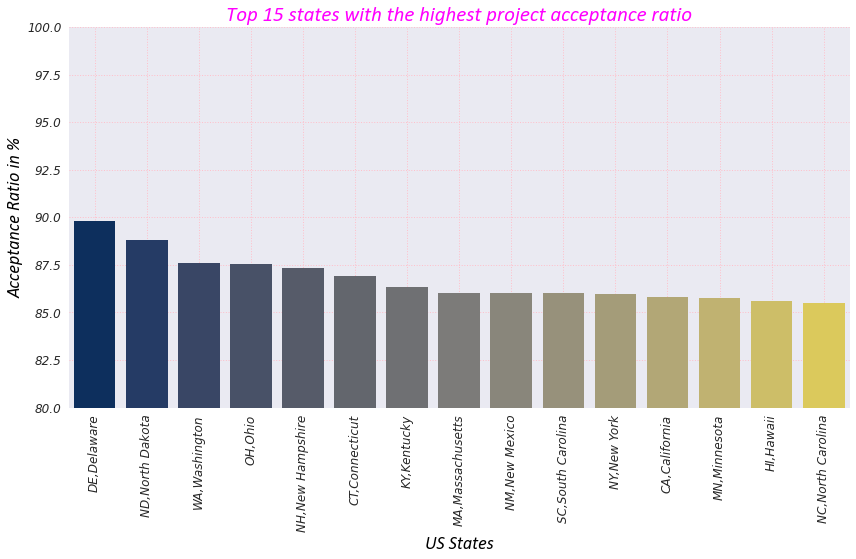

In [28]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='perc_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==1].sort_values(by='perc_subms',ascending=False).iloc[0:15,:],
                palette='cividis')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Acceptance Ratio in %",fontdict=lbl_dict)
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.ylim(80,100)
    plt.title("Top 15 states with the highest project acceptance ratio",fontdict=ttl_dict)

In [29]:
print("*****Top 15 states with the highest project acceptance ratio*****")
data_tab = states_apprv_rejec[states_apprv_rejec['project_is_approved']==1].sort_values(by='perc_subms',ascending=False).iloc[0:15,[3,-2]]
data_tab.reset_index(drop=True,inplace=True)
x = PrettyTable()
x.field_names = ["Seq.","States/Codes", "Submissions_%"]
for i in range(0,15,1):
    x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1]])
print(x)

*****Top 15 states with the highest project acceptance ratio*****
+------+-------------------+---------------+
| Seq. |    States/Codes   | Submissions_% |
+------+-------------------+---------------+
|  0   |    DE,Delaware    |      89.8     |
|  1   |  ND,North Dakota  |     88.81     |
|  2   |   WA,Washington   |     87.62     |
|  3   |      OH,Ohio      |     87.52     |
|  4   |  NH,New Hampshire |     87.36     |
|  5   |   CT,Connecticut  |     86.89     |
|  6   |    KY,Kentucky    |     86.35     |
|  7   |  MA,Massachusetts |     86.02     |
|  8   |   NM,New Mexico   |      86.0     |
|  9   | SC,South Carolina |      86.0     |
|  10  |    NY,New York    |     85.97     |
|  11  |   CA,California   |     85.81     |
|  12  |    MN,Minnesota   |     85.76     |
|  13  |     HI,Hawaii     |      85.6     |
|  14  | NC,North Carolina |      85.5     |
+------+-------------------+---------------+


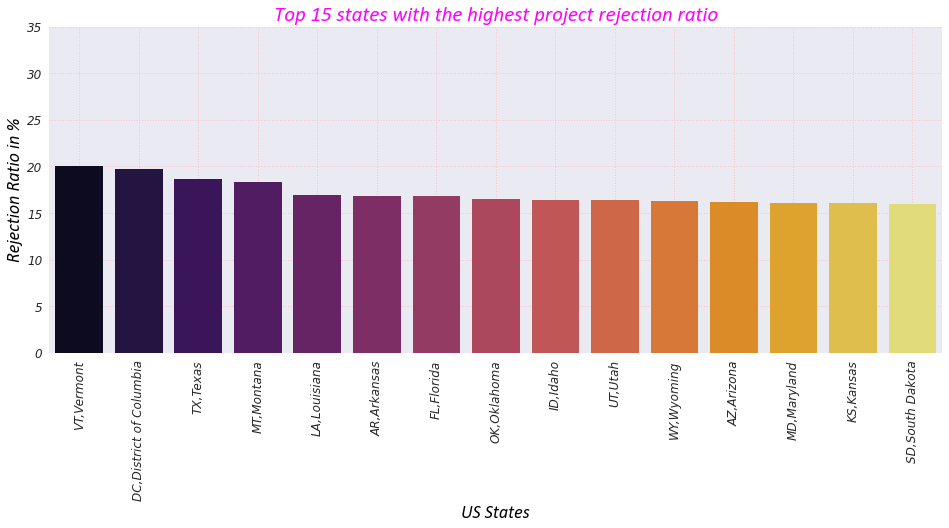

In [30]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,6))
    sns.barplot(x='state_codes_names',y='perc_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='perc_subms',ascending=False).iloc[0:15,:],
                palette='inferno')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Rejection Ratio in %",fontdict=lbl_dict)
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.ylim(0,35)
    plt.title("Top 15 states with the highest project rejection ratio",fontdict=ttl_dict)

In [31]:
print("*****Top 15 states with the highest project rejection ratio*****")
data_tab = states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='perc_subms',ascending=False).iloc[0:15,[3,-2]]
data_tab.reset_index(drop=True,inplace=True)
x = PrettyTable()
x.field_names = ["Seq.","States/Codes", "Submissions_%"]
for i in range(0,15,1):
    x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1]])
print(x)

*****Top 15 states with the highest project rejection ratio*****
+------+-------------------------+---------------+
| Seq. |       States/Codes      | Submissions_% |
+------+-------------------------+---------------+
|  0   |        VT,Vermont       |      20.0     |
|  1   | DC,District of Columbia |     19.77     |
|  2   |         TX,Texas        |     18.69     |
|  3   |        MT,Montana       |     18.37     |
|  4   |       LA,Louisiana      |     16.88     |
|  5   |       AR,Arkansas       |     16.87     |
|  6   |        FL,Florida       |     16.83     |
|  7   |       OK,Oklahoma       |     16.52     |
|  8   |         ID,Idaho        |     16.45     |
|  9   |         UT,Utah         |     16.35     |
|  10  |        WY,Wyoming       |     16.33     |
|  11  |        AZ,Arizona       |     16.16     |
|  12  |       MD,Maryland       |     16.12     |
|  13  |        KS,Kansas        |     16.09     |
|  14  |     SD,South Dakota     |      16.0     |
+------+---------

#### **Data Analysis Functions**

In [32]:
def analysis_data_prep(df_obj,tgt_val,indp_val,trunc_flg):
    """
    Description: This function is created for performing the univariate data analysis results prep.
    
    Input parameters: It accepts below inputs:
        1. `df_obj`: Pandas DataFrame
                Dataframe containing the entire dataset.
        2. `tgt_val`: str
                Target class attribute name exists in df_obj will be used for grouping the data based on classes.
        3. `indp_val`: str
                Feature/Attribute name that exists in df_obj and needs to be analysed.
        4. `trunc_flg`: boolean
                This is a flag parameter used for limiting the data if many classes exists in independent variable.
    
    Return: It returns either of the pandas dataframe objects `tmp5` or `tmp`.
        `tmp5`: Returned if trunc_flg is True then 60 records of every target class is selected based on the independent variable categories.
                (30 from both top & bottom total submissions)
         else
        `tmp` is returned which contains data from all the feature .
    """
    tmp_df = df_obj.copy(deep=True)
    tmp_df.reset_index(inplace=True)
    
    # Calculating the total submissions in every feature class
    total_subms = tmp_df[indp_val].value_counts().to_dict()
    
    # Generating the multi-index to get the zero count as well if record doesn't exist in feature class 
    mul_idx = pd.MultiIndex.from_product([tmp_df[tgt_val].unique(),tmp_df[indp_val].unique()],names=[tgt_val,indp_val])
    tmp = pd.DataFrame(tmp_df.groupby([tgt_val,indp_val])['index'].count()).reindex(mul_idx, fill_value=0)\
    .reset_index().rename(columns={'index':'count'}).copy(deep=True)
    
    # Generating the total submissions column 
    tmp['tot_subms'] = tmp[indp_val].apply(lambda val: total_subms.get(val))
    
    # Generating the percentage submissions column
    tmp['perc_subms'] = tmp[['count','tot_subms']].apply(lambda row: np.round((row['count']/row['tot_subms'])*100.0,2),axis=1)
    
    # trunc_flg is used if feature variable contains numerous categories
    if trunc_flg:
        tmp1 = tmp[tmp[tgt_val]==0].sort_values(by='tot_subms',ascending=False).iloc[:30,:].reset_index(drop=True)
        tmp2 = tmp[tmp[tgt_val]==0].sort_values(by='tot_subms',ascending=True).iloc[:30,:].reset_index(drop=True)
        tmp3 = tmp[tmp[tgt_val]==1].sort_values(by='tot_subms',ascending=False).iloc[:30,:].reset_index(drop=True)
        tmp4 = tmp[tmp[tgt_val]==1].sort_values(by='tot_subms',ascending=True).iloc[:30,:].reset_index(drop=True)
        tmp5 = pd.concat([tmp1,tmp2,tmp3,tmp4],axis=0).reset_index(drop=True)
        del tmp_df
        return tmp5
    else:
        del tmp_df
        return tmp
    
def univariate_analysis(df_obj,tgt_val,indp_val,xlabel,ylabel,t_flg=False):
    """
    Description: This function is created for plotting the graphs.
    
    Input parameters: It accepts below inputs:
        1. `df_obj`: Pandas DataFrame
                Dataframe containing the entire dataset.
        2. `tgt_val`: str
                Target class attribute name exists in df_obj will be used for grouping the data based on classes.
        3. `indp_val`: str
                Feature/Attribute name that exists in df_obj and needs to be analysed.
        4. `xlabel`: str
                X-axis label used in plotting.
        5. `ylabel`: str
                Y-axis label used in plotting.
        6. `t_flg`: boolean
                This is a flag parameter used for limiting the data if many classes exists in independent variable.
    
    Return: None
    """
    # Calling the analysis data prep function
    df = analysis_data_prep(df_obj,tgt_val,indp_val,t_flg)
    
    # Limiting the features classes for plotting
    unique_categories = int(df[df[tgt_val]==0][indp_val].nunique())
    if unique_categories > 20:
        thresh_rec = 16
    else:
        thresh_rec = unique_categories
    
    def fig_size(th_flag, diff_plot=False):
        """
        Description: This function is created for providing the figure size based on the data.
        
        Inputs: It accepts two parameters:
            1. `th_flag`: boolean
                This is a flag parameter used for limiting the data if many classes exists in independent variable.
            2. `diff_plot`: boolean
                This is another flag parameter for providing a different size if data points are very high.
        
        Return:
            1. `f_size`: tuple
                This is the figure size to be used for plotting.
        """
        if th_flag == True and diff_plot==True:
            f_size = (14,16)
            return f_size
        elif th_flag == True and diff_plot==False:
            f_size = (14,7)
            return f_size
        else:
            f_size = (8,7)
            return f_size
        
    ## Plot-1 :: Displaying "Highest number of project submissions"
    with plt.style.context('seaborn'):
        plt.figure(figsize=fig_size(t_flg))
        sns.barplot(x=indp_val,y='tot_subms',data=df[df[tgt_val]==0].sort_values(by='tot_subms',ascending=False),palette='gist_rainbow')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel(ylabel,fontdict=lbl_dict)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.title("Highest number of project submissions",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 1.1 :: Printing outcome values in a prettytable
    print('\n',"*** Highest number of project submissions ***")
    
    data_tab = df[df[tgt_val]==0].sort_values(by='tot_subms',ascending=False)\
    .reset_index(drop=True).iloc[:thresh_rec,:][[indp_val,'tot_subms']].rename(columns={'tot_subms':'Total_Submissions'})
    data_tab.reset_index(drop=True,inplace=True)
    
    x = PrettyTable()
    x.field_names = ["Seq.",indp_val, "Total_Submissions"]
    for i in range(0,thresh_rec,1):
        x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1]])
    print(x,'\n')
    
    ## Plot-2 :: Displaying the data in a stacked bar plot
    x_index = np.arange(df[df[tgt_val]==0].shape[0])  
    with plt.style.context('seaborn'):
        plt.figure(figsize=fig_size(t_flg,diff_plot=True))
        total = plt.barh(x_index, df[df[tgt_val]==0]['tot_subms'].values)
        approved = plt.barh(x_index, df[df[tgt_val]==1]['count'].values)
        plt.xlabel(ylabel,fontdict=lbl_dict)
        plt.ylabel(xlabel,fontdict=lbl_dict)
        plt.title('% of projects aproved for funding',fontdict=ttl_dict)
        plt.yticks(x_index,list(df[df[tgt_val]==0][indp_val].values),rotation=0,style='oblique',size=12)
        plt.xticks(style='oblique',size=12)
        plt.legend((total[0], approved[0]), ('Total', 'Approved'))
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    print('\n')
    
    ## Plot-3 :: Displaying "Highest project acceptance ratio"
    with plt.style.context('seaborn'):
        plt.figure(figsize=fig_size(t_flg))
        sns.barplot(x=indp_val,y='perc_subms',data=df[df[tgt_val]==1].sort_values(by='perc_subms',ascending=False),palette='cividis')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel("Approved %",fontdict=lbl_dict)
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.ylim(60,100)
        plt.title("Highest project acceptance ratio",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 3.1 :: Printing outcome values in a prettytable
    print('\n',"*** Highest project acceptance ratio ***")
    
    data_tab = df[df[tgt_val]==1].sort_values(by='perc_subms',ascending=False)\
    .reset_index(drop=True).iloc[:thresh_rec,:][[indp_val,'count','tot_subms','perc_subms']]\
    .rename(columns={'count':'Apprv_Submissions','tot_subms':'Total_Submissions','perc_subms':'Apprv_%'})
    
    data_tab.reset_index(drop=True,inplace=True)
    x = PrettyTable()
    x.field_names = ["Seq.",indp_val,"Apprv_Submissions","Total_Submissions","Apprv_%"]
    for i in range(0,thresh_rec,1):
        x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1],data_tab.iloc[i,2],data_tab.iloc[i,3]])
    print(x,'\n')
    
    ## Plot-4 :: Displaying "Highest project rejection ratio"
    """Although the plot-3 is an opposite of plot-4 and kind of portray the same info with a different manner, 
       but its always better to plot it explicitly"""
    with plt.style.context('seaborn'):
        plt.figure(figsize=fig_size(t_flg))
        sns.barplot(x=indp_val,y='perc_subms',data=df[df[tgt_val]==0].sort_values(by='perc_subms',ascending=False),palette='winter')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel("Rejection %",fontdict=lbl_dict)
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.ylim(0,50)
        plt.title("Highest project rejection ratio",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 4.1 ::  Printing outcome values in a prettytable
    print('\n',"*** Highest project rejection ratio ***")    
    
    data_tab = df[df[tgt_val]==0].sort_values(by='perc_subms',ascending=False)\
    .reset_index(drop=True).iloc[:thresh_rec,:][[indp_val,'count','tot_subms','perc_subms']]\
    .rename(columns={'count':'Reject_Submissions','tot_subms':'Total_Submissions','perc_subms':'Reject_%'})    
    
    data_tab.reset_index(drop=True,inplace=True)
    x = PrettyTable()
    x.field_names = ["Seq.",indp_val,"Reject_Submissions","Total_Submissions","Reject_%"]
    for i in range(0,thresh_rec,1):
        x.add_row([i,data_tab.iloc[i,0],data_tab.iloc[i,1],data_tab.iloc[i,2],data_tab.iloc[i,3]])
    print(x,'\n')

### **Attribute-2**
- **`Teacher Prefix`**

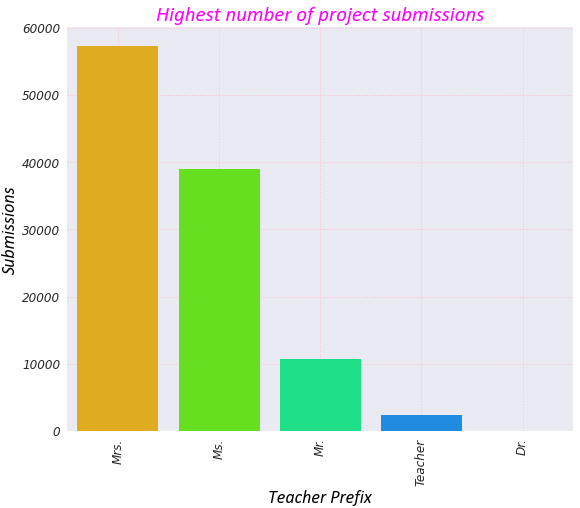


 *** Highest number of project submissions ***
+------+----------------+-------------------+
| Seq. | teacher_prefix | Total_Submissions |
+------+----------------+-------------------+
|  0   |      Mrs.      |      57269.0      |
|  1   |      Ms.       |      38955.0      |
|  2   |      Mr.       |      10648.0      |
|  3   |    Teacher     |       2360.0      |
|  4   |      Dr.       |        13.0       |
+------+----------------+-------------------+ 



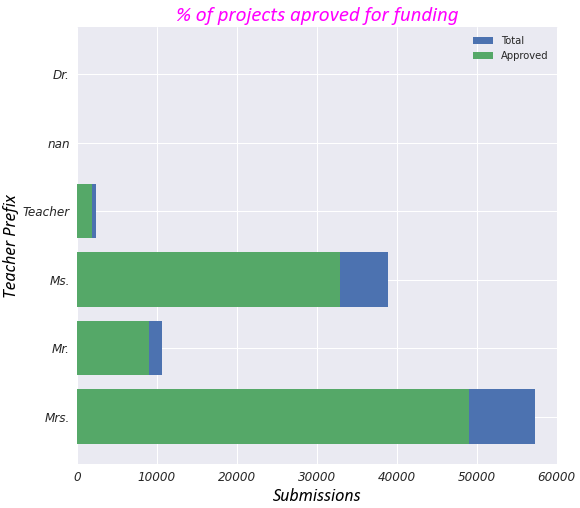

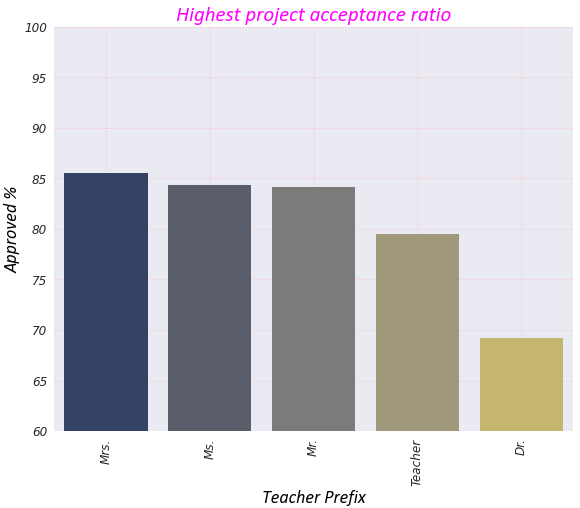


 *** Highest project acceptance ratio ***
+------+----------------+-------------------+-------------------+---------+
| Seq. | teacher_prefix | Apprv_Submissions | Total_Submissions | Apprv_% |
+------+----------------+-------------------+-------------------+---------+
|  0   |      Mrs.      |       48997       |      57269.0      |  85.56  |
|  1   |      Ms.       |       32860       |      38955.0      |  84.35  |
|  2   |      Mr.       |        8960       |      10648.0      |  84.15  |
|  3   |    Teacher     |        1877       |       2360.0      |  79.53  |
|  4   |      Dr.       |         9         |        13.0       |  69.23  |
+------+----------------+-------------------+-------------------+---------+ 



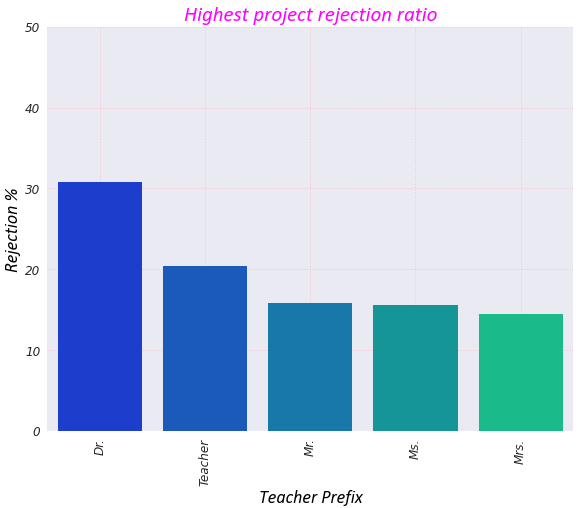


 *** Highest project rejection ratio ***
+------+----------------+--------------------+-------------------+----------+
| Seq. | teacher_prefix | Reject_Submissions | Total_Submissions | Reject_% |
+------+----------------+--------------------+-------------------+----------+
|  0   |      Dr.       |         4          |        13.0       |  30.77   |
|  1   |    Teacher     |        483         |       2360.0      |  20.47   |
|  2   |      Mr.       |        1688        |      10648.0      |  15.85   |
|  3   |      Ms.       |        6095        |      38955.0      |  15.65   |
|  4   |      Mrs.      |        8272        |      57269.0      |  14.44   |
+------+----------------+--------------------+-------------------+----------+ 



In [33]:
univariate_analysis(dc_train_df,'project_is_approved','teacher_prefix','Teacher Prefix','Submissions')

### **Attribute-3**
- **`Project Grade Category`**

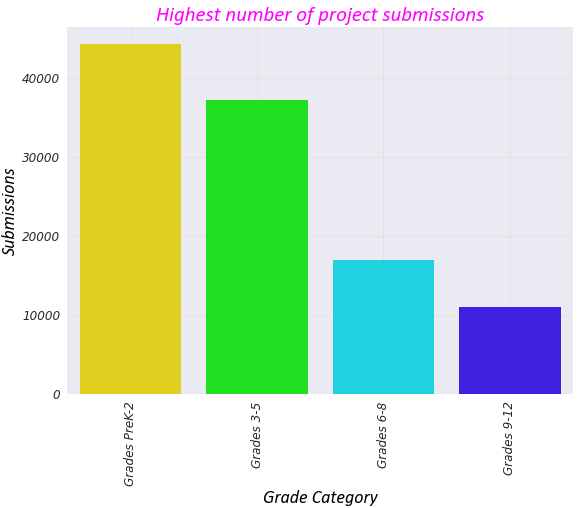


 *** Highest number of project submissions ***
+------+------------------------+-------------------+
| Seq. | project_grade_category | Total_Submissions |
+------+------------------------+-------------------+
|  0   |     Grades PreK-2      |       44225       |
|  1   |       Grades 3-5       |       37137       |
|  2   |       Grades 6-8       |       16923       |
|  3   |      Grades 9-12       |       10963       |
+------+------------------------+-------------------+ 



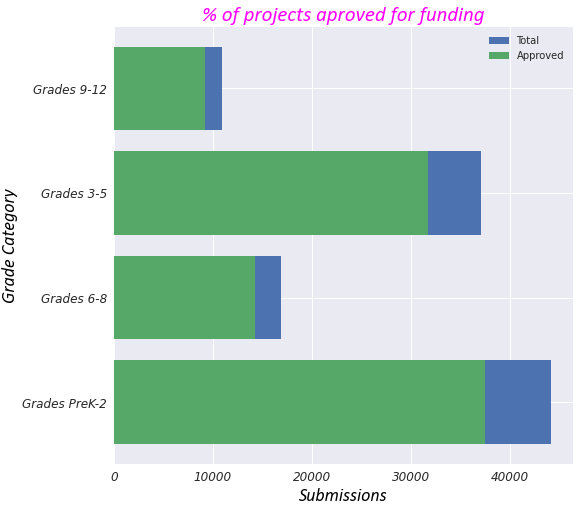

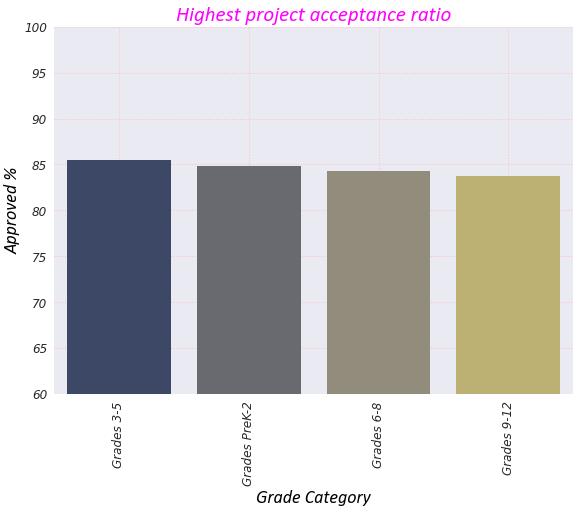


 *** Highest project acceptance ratio ***
+------+------------------------+-------------------+-------------------+---------+
| Seq. | project_grade_category | Apprv_Submissions | Total_Submissions | Apprv_% |
+------+------------------------+-------------------+-------------------+---------+
|  0   |       Grades 3-5       |       31729       |       37137       |  85.44  |
|  1   |     Grades PreK-2      |       37536       |       44225       |  84.88  |
|  2   |       Grades 6-8       |       14258       |       16923       |  84.25  |
|  3   |      Grades 9-12       |        9183       |       10963       |  83.76  |
+------+------------------------+-------------------+-------------------+---------+ 



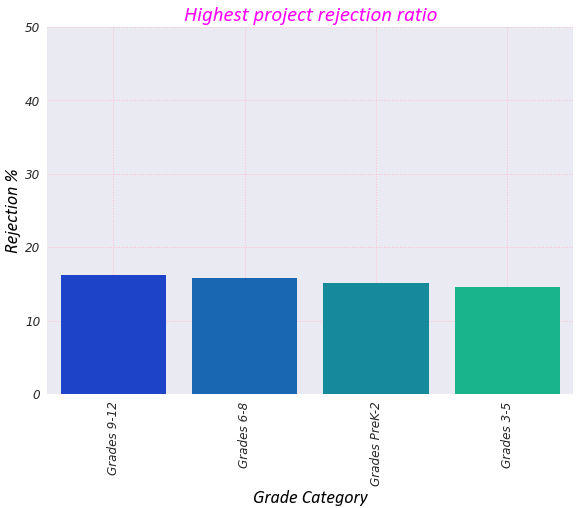


 *** Highest project rejection ratio ***
+------+------------------------+--------------------+-------------------+----------+
| Seq. | project_grade_category | Reject_Submissions | Total_Submissions | Reject_% |
+------+------------------------+--------------------+-------------------+----------+
|  0   |      Grades 9-12       |        1780        |       10963       |  16.24   |
|  1   |       Grades 6-8       |        2665        |       16923       |  15.75   |
|  2   |     Grades PreK-2      |        6689        |       44225       |  15.12   |
|  3   |       Grades 3-5       |        5408        |       37137       |  14.56   |
+------+------------------------+--------------------+-------------------+----------+ 



In [34]:
univariate_analysis(dc_train_df,'project_is_approved','project_grade_category','Grade Category','Submissions')

### **Attribute-4**
- **`Project Subject Category`**

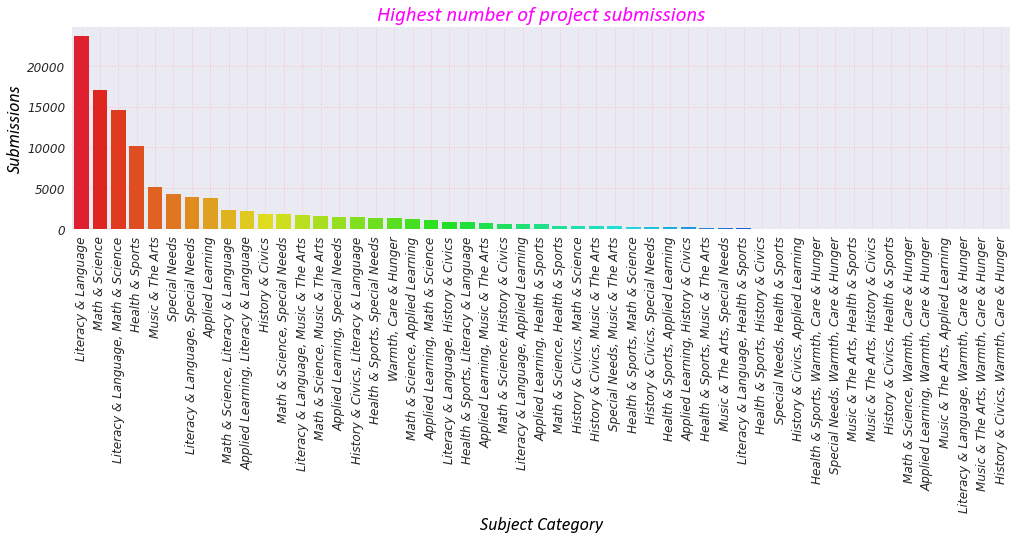


 *** Highest number of project submissions ***
+------+---------------------------------------+-------------------+
| Seq. |       project_subject_categories      | Total_Submissions |
+------+---------------------------------------+-------------------+
|  0   |          Literacy & Language          |       23655       |
|  1   |             Math & Science            |       17072       |
|  2   |  Literacy & Language, Math & Science  |       14636       |
|  3   |            Health & Sports            |       10177       |
|  4   |            Music & The Arts           |        5180       |
|  5   |             Special Needs             |        4226       |
|  6   |   Literacy & Language, Special Needs  |        3961       |
|  7   |            Applied Learning           |        3771       |
|  8   |  Math & Science, Literacy & Language  |        2289       |
|  9   | Applied Learning, Literacy & Language |        2191       |
|  10  |            History & Civics           |       

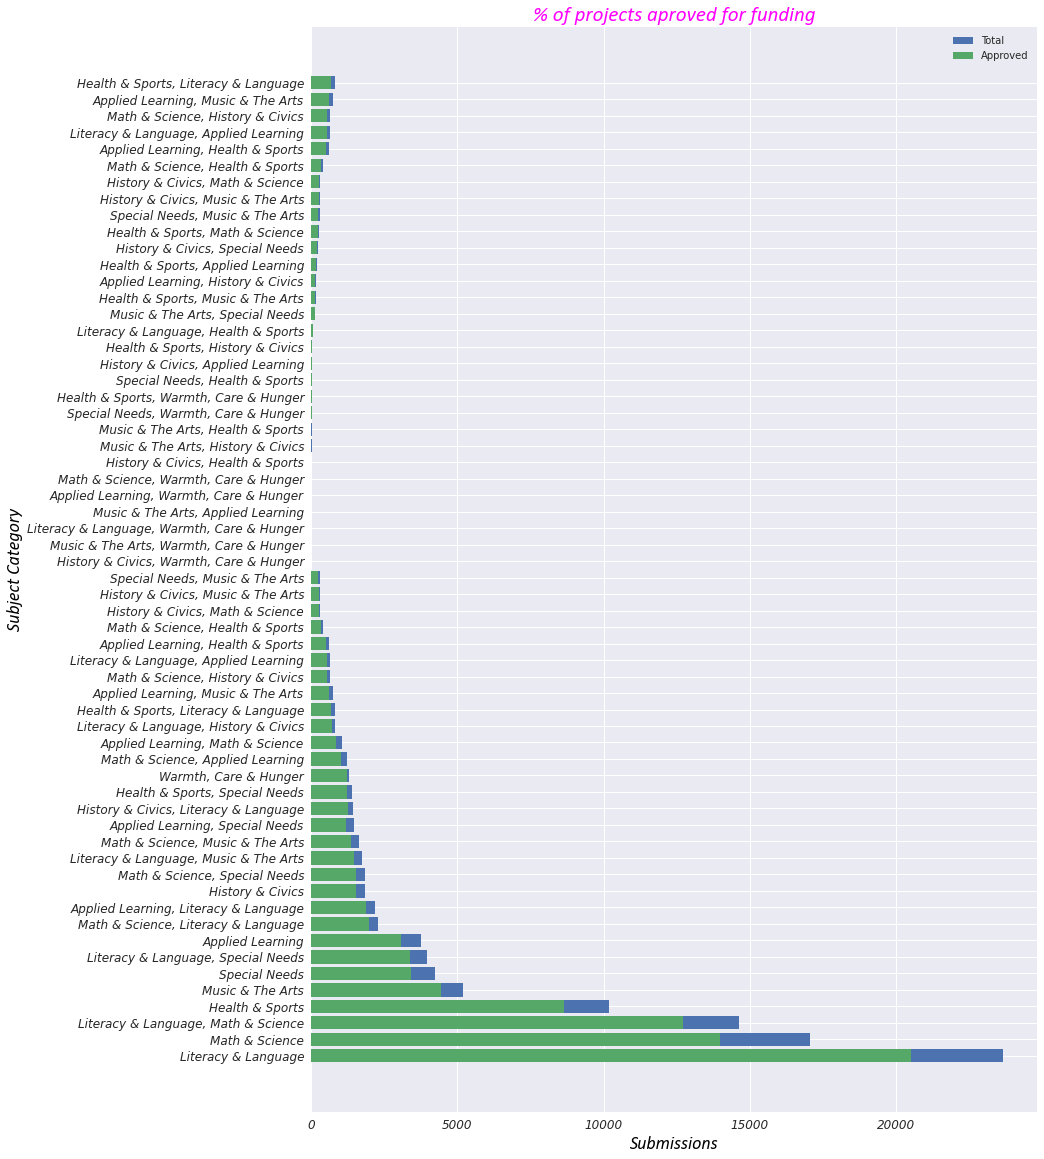

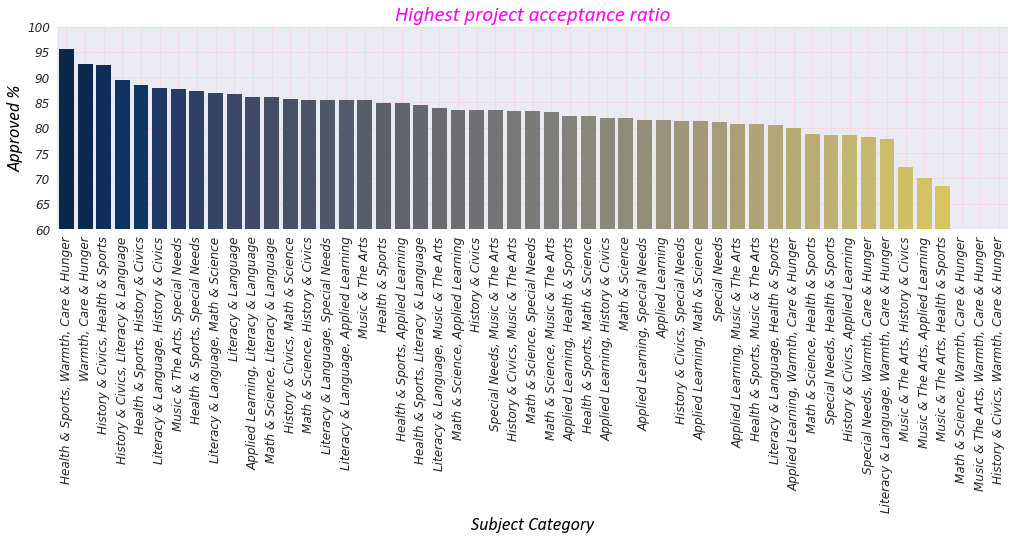


 *** Highest project acceptance ratio ***
+------+----------------------------------------+-------------------+-------------------+---------+
| Seq. |       project_subject_categories       | Apprv_Submissions | Total_Submissions | Apprv_% |
+------+----------------------------------------+-------------------+-------------------+---------+
|  0   | Health & Sports, Warmth, Care & Hunger |         22        |         23        |  95.65  |
|  1   |         Warmth, Care & Hunger          |        1212       |        1309       |  92.59  |
|  2   |   History & Civics, Health & Sports    |         12        |         13        |  92.31  |
|  3   | History & Civics, Literacy & Language  |        1271       |        1421       |  89.44  |
|  4   |   Health & Sports, History & Civics    |         38        |         43        |  88.37  |
|  5   | Literacy & Language, History & Civics  |        710        |        809        |  87.76  |
|  6   |    Music & The Arts, Special Needs     |        

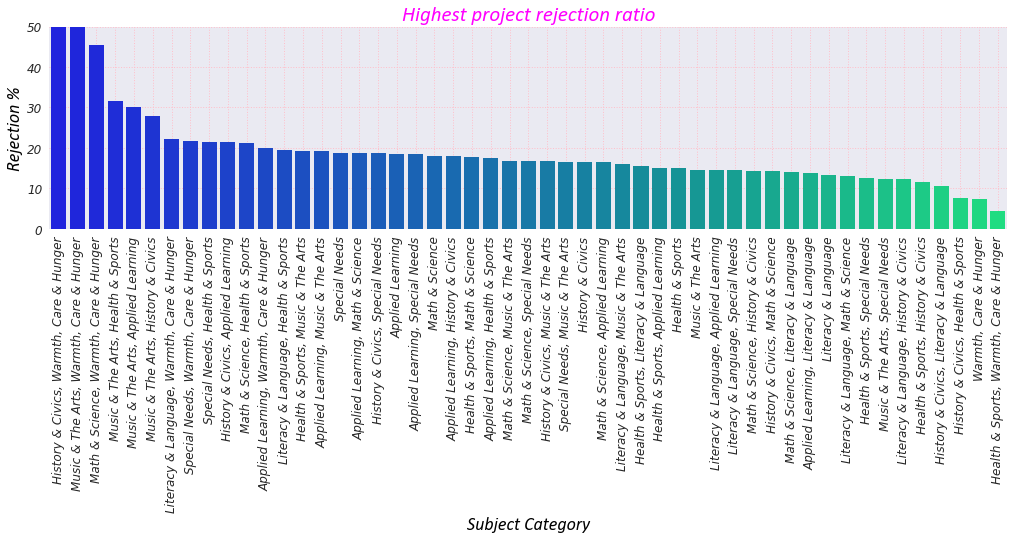


 *** Highest project rejection ratio ***
+------+--------------------------------------------+--------------------+-------------------+----------+
| Seq. |         project_subject_categories         | Reject_Submissions | Total_Submissions | Reject_% |
+------+--------------------------------------------+--------------------+-------------------+----------+
|  0   |  History & Civics, Warmth, Care & Hunger   |         1          |         1         |  100.0   |
|  1   |  Music & The Arts, Warmth, Care & Hunger   |         1          |         2         |   50.0   |
|  2   |   Math & Science, Warmth, Care & Hunger    |         5          |         11        |  45.45   |
|  3   |     Music & The Arts, Health & Sports      |         6          |         19        |  31.58   |
|  4   |     Music & The Arts, Applied Learning     |         3          |         10        |   30.0   |
|  5   |     Music & The Arts, History & Civics     |         5          |         18        |  27.78   |
|  6

In [35]:
univariate_analysis(dc_train_df,'project_is_approved','project_subject_categories','Subject Category','Submissions',t_flg=True)

### **Attribute-5**
- **`Project Subject Sub-Category`**

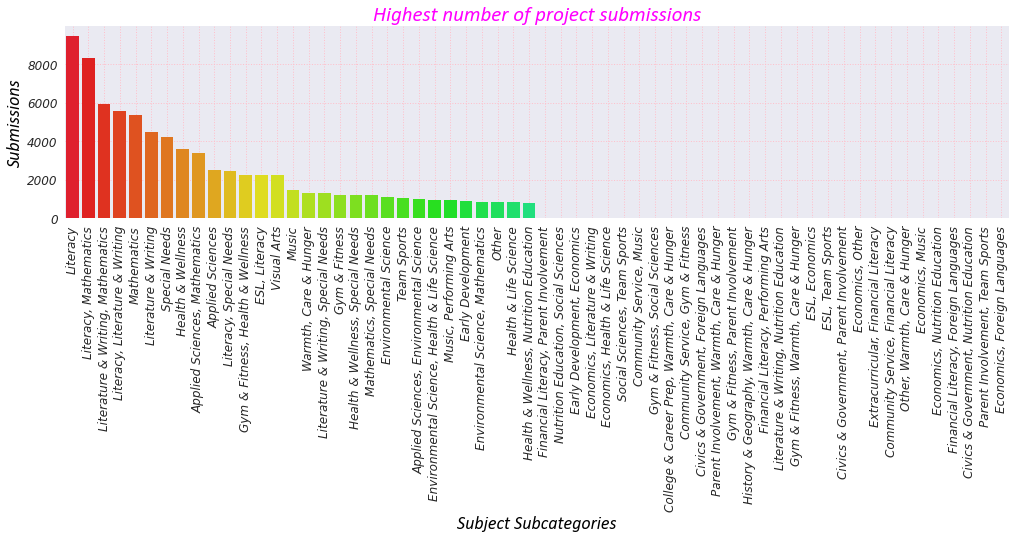


 *** Highest number of project submissions ***
+------+-----------------------------------+-------------------+
| Seq. |   project_subject_subcategories   | Total_Submissions |
+------+-----------------------------------+-------------------+
|  0   |              Literacy             |        9486       |
|  1   |       Literacy, Mathematics       |        8325       |
|  2   | Literature & Writing, Mathematics |        5923       |
|  3   |   Literacy, Literature & Writing  |        5571       |
|  4   |            Mathematics            |        5379       |
|  5   |        Literature & Writing       |        4501       |
|  6   |           Special Needs           |        4226       |
|  7   |         Health & Wellness         |        3583       |
|  8   |   Applied Sciences, Mathematics   |        3399       |
|  9   |          Applied Sciences         |        2492       |
|  10  |      Literacy, Special Needs      |        2440       |
|  11  |  Gym & Fitness, Health & Wellness

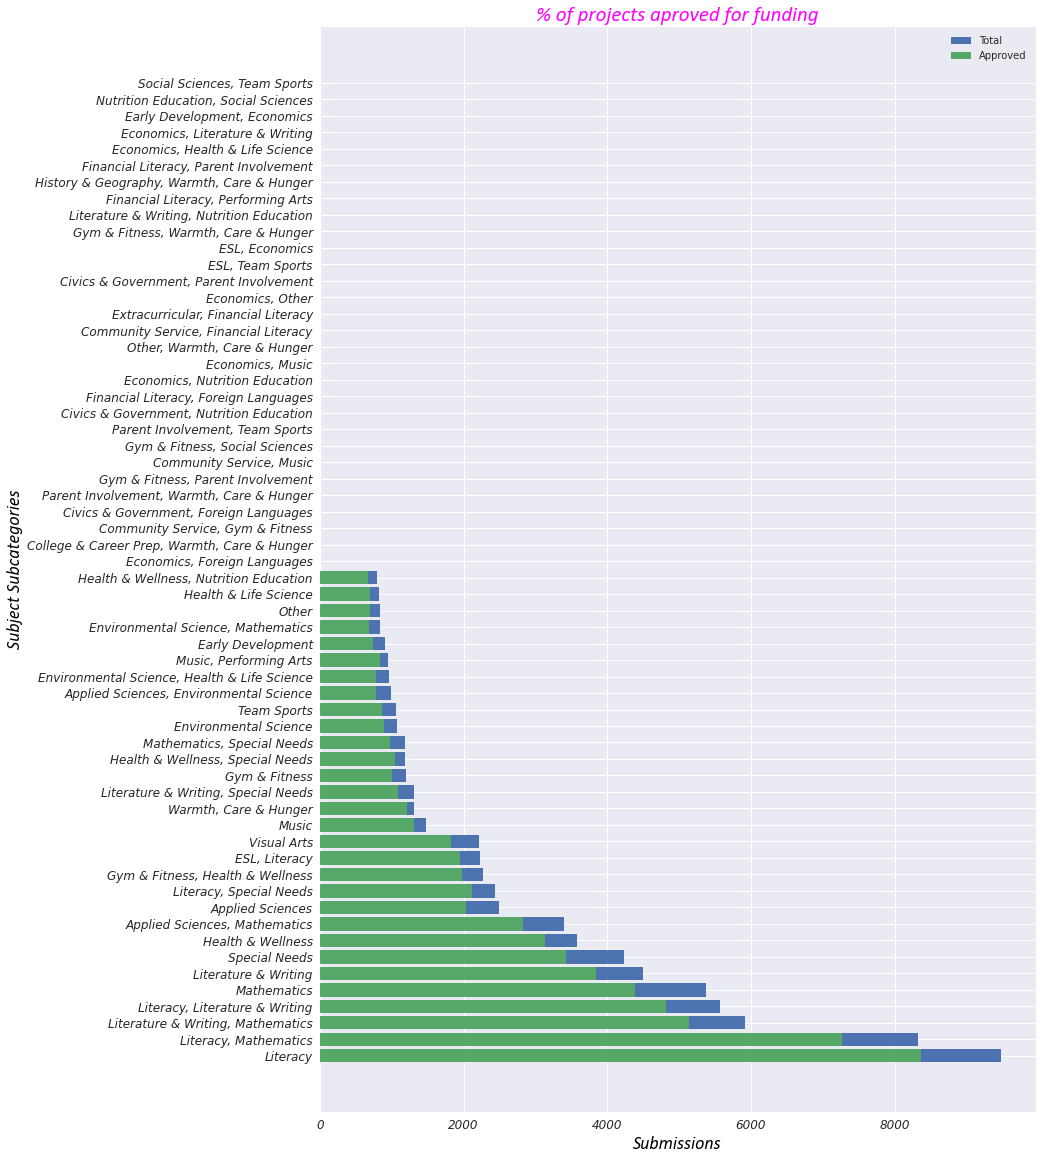

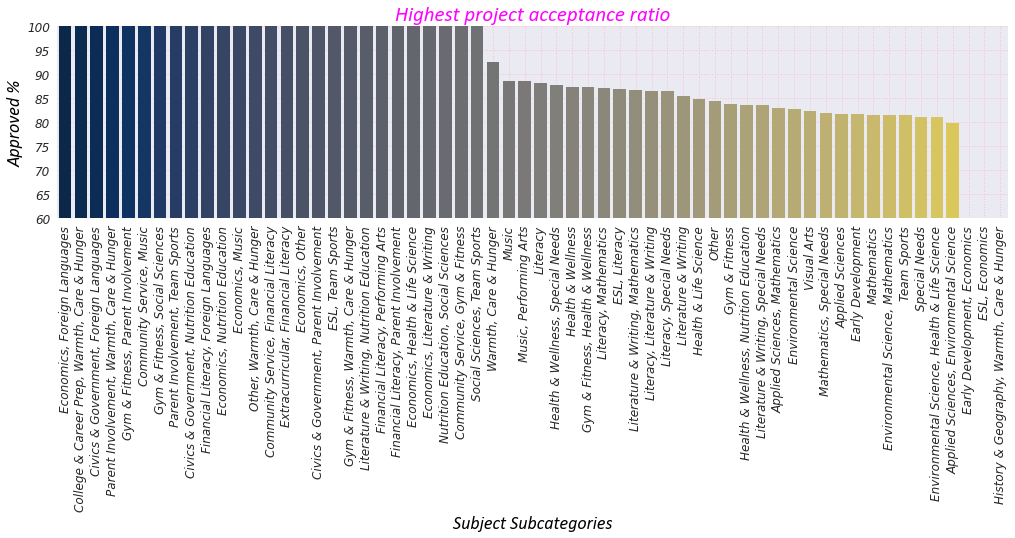


 *** Highest project acceptance ratio ***
+------+----------------------------------------------+-------------------+-------------------+---------+
| Seq. |        project_subject_subcategories         | Apprv_Submissions | Total_Submissions | Apprv_% |
+------+----------------------------------------------+-------------------+-------------------+---------+
|  0   |         Economics, Foreign Languages         |         1         |         1         |  100.0  |
|  1   | College & Career Prep, Warmth, Care & Hunger |         1         |         1         |  100.0  |
|  2   |    Civics & Government, Foreign Languages    |         1         |         1         |  100.0  |
|  3   |  Parent Involvement, Warmth, Care & Hunger   |         1         |         1         |  100.0  |
|  4   |      Gym & Fitness, Parent Involvement       |         1         |         1         |  100.0  |
|  5   |           Community Service, Music           |         1         |         1         |  100.0  |
|  

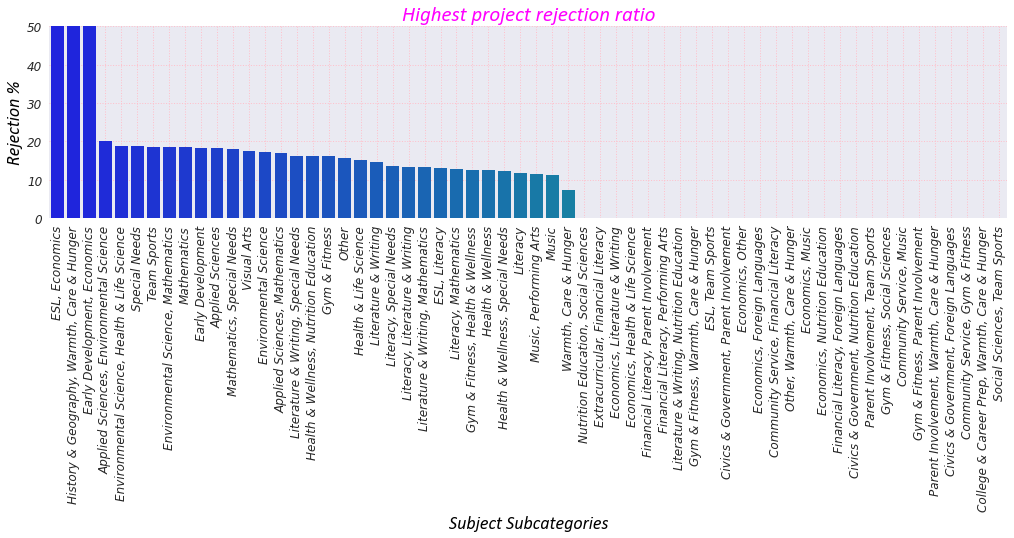


 *** Highest project rejection ratio ***
+------+----------------------------------------------+--------------------+-------------------+----------+
| Seq. |        project_subject_subcategories         | Reject_Submissions | Total_Submissions | Reject_% |
+------+----------------------------------------------+--------------------+-------------------+----------+
|  0   |                ESL, Economics                |         1          |         1         |  100.0   |
|  1   |  History & Geography, Warmth, Care & Hunger  |         1          |         1         |  100.0   |
|  2   |         Early Development, Economics         |         1          |         2         |   50.0   |
|  3   |   Applied Sciences, Environmental Science    |        199         |        984        |  20.22   |
|  4   | Environmental Science, Health & Life Science |        182         |        964        |  18.88   |
|  5   |                Special Needs                 |        795         |        4226      

In [36]:
univariate_analysis(dc_train_df,'project_is_approved','project_subject_subcategories','Subject Subcategories','Submissions',t_flg=True)

### **Attribute-6**
- **`Teacher's number of previously posted projects`**

In [37]:
teacher_prev_projs = pd.DataFrame(dc_train_df.groupby(['project_is_approved','teacher_number_of_previously_posted_projects'])['id'].
                                  count()).reset_index().rename(columns={'id':'Submissions'})

In [38]:
def feat_buckets(val):
    """
    Description: This function is created for segregating the features values in buckets.
    
    Input: It accepts only one parameter:
        1. `val`: int
            Feature value used for allocating its bucket.
            
    Return: Bucket belongs to feature value.
    """
    
    if val >=0 and val <=50:
        return '0-50'
    elif val >=51 and val <=100:
        return '51-100'
    elif val >=101 and val <=150:
        return '101-150'
    elif val >=151 and val <=200:
        return '151-200'
    elif val >=201 and val <=250:
        return '201-250'
    elif val >=251 and val <=300:
        return '251-300'
    elif val >=301 and val <=350:
        return '301-350'
    elif val >=351 and val <=400:
        return '351-400'
    elif val >=401 and val <=451:
        return '401-451'

In [39]:
teacher_prev_projs['prev_proj_buckets'] = teacher_prev_projs['teacher_number_of_previously_posted_projects'].\
                                                apply(lambda prev_proj: feat_buckets(prev_proj))

In [40]:
mul_index = pd.MultiIndex.from_product([teacher_prev_projs['project_is_approved'].unique(),teacher_prev_projs['prev_proj_buckets'].unique()],
                                       names=['project_is_approved','prev_proj_buckets'])

In [41]:
teacher_prev_projs_bkts = teacher_prev_projs.groupby(['project_is_approved','prev_proj_buckets'])['Submissions'].sum().\
                                                    reindex(mul_index, fill_value=0).reset_index().rename(columns={'index':'count'})

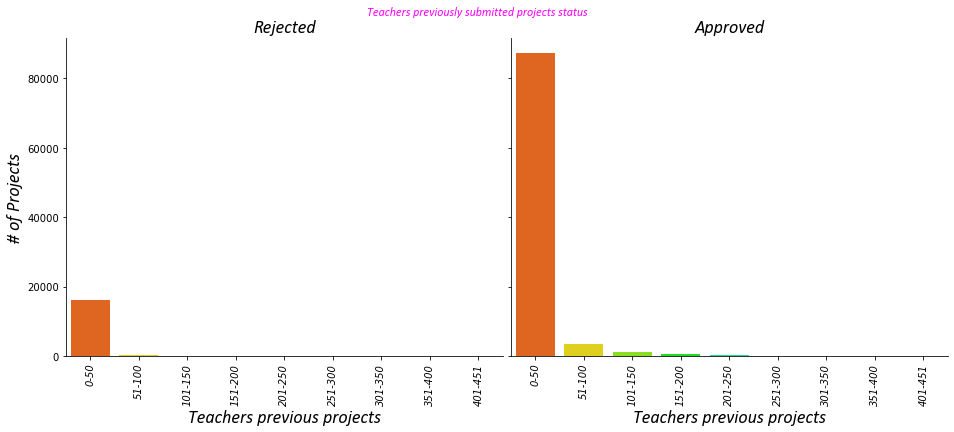

In [42]:
prev_projs = sns.catplot(data=teacher_prev_projs_bkts,x='prev_proj_buckets',y='Submissions',col='project_is_approved',
                         kind='bar',orient='v',palette='gist_rainbow',aspect=1.1,height=6)
axes = prev_projs.axes.flatten()
axes[0].set_title("Rejected",fontdict=lbl_dict)
axes[0].set_xlabel("Teachers previous projects",fontdict=lbl_dict)
axes[0].set_ylabel("# of Projects",fontdict=lbl_dict)
axes[1].set_title("Approved",fontdict=lbl_dict)
axes[1].set_xlabel("Teachers previous projects",fontdict=lbl_dict)
axes[1].set_ylabel("",fontdict=lbl_dict)
prev_projs.fig.suptitle("Teachers previously submitted projects status",fontdict=ttl_dict)
prev_projs.set_xticklabels(rotation=90,size=10,style='oblique')
plt.tight_layout(pad=0.5,h_pad=0.3)
plt.show()

In [43]:
teacher_prev_projs

project_is_approved  teacher_number_of_previously_posted_projects  \
0                      0                                             0   
1                      0                                             1   
2                      0                                             2   
3                      0                                             3   
4                      0                                             4   
..                   ...                                           ...   
548                    1                                           428   
549                    1                                           432   
550                    1                                           433   
551                    1                                           437   
552                    1                                           451   

     Submissions prev_proj_buckets  
0           5362              0-50  
1           2729              0-50  
2           1645              0-50  
3           1113              0-50  
4            814              0-50  
..           ...               ...  
548            1           401-451  
549            1           401-451  
550            1           401-451  
551            1           401-451  
552            1           401-451  

[553 rows x 4 columns]

### **Attribute-7**
- **`Project Resource Summary`**

In [44]:
indxs = np.random.randint(0,100000,14)
for idx in indxs:
    print(idx,'::',dc_train_df['project_resource_summary'].iloc[idx],'::',dc_train_df['project_is_approved'].iloc[idx])

### Odd ones out : 46654,60959,12
print(12,'::',dc_train_df['project_resource_summary'].iloc[12],'::',dc_train_df['project_is_approved'].iloc[12])
print(46654,'::',dc_train_df['project_resource_summary'].iloc[46654],'::',dc_train_df['project_is_approved'].iloc[46654])
print(60959,'::',dc_train_df['project_resource_summary'].iloc[60959],'::',dc_train_df['project_is_approved'].iloc[60959])

5758 :: My students need balance ball chairs to help them release energy without disrupting instruction. :: 1
41245 :: My students need more than just pens and paper. Please help make learning more interactive by providing us with ipad mini's and headphones. :: 0
70005 :: My students need chart paper, ink and Clorox wipes to create one of a kind research projects for science. :: 1
22202 :: My students need 2 two Google Chromebooks to enhance and improve their classroom learning opportunities. :: 1
88899 :: My students need an ELMO document camera. :: 1
27327 :: My students need weighted, sensory items to help them regulate their behavior. :: 1
10574 :: My students need kinetic learning materials for cooperative learning experiences.  These building sets would be amazing for developing imagination and teamwork skills! :: 0
37652 :: My students need early finishing activities to keep their minds and hands busy. STEM boxes will be a great option for my highly motivated, curious learners. 

In [45]:
def check_nums_in_summary(text):
    """
    Description: This function is created for return the boolean value based on existence of numbers in the text.
    
    Inputs: It accepts below parameters:
        1. `text`: str
            Text in which numbers existence needs to be found.
    
    Return: boolean value(1 if numbers exists else 0)
    
    `NOTE`: I'm finding the pure numbers in the text. Refer below examples:
    
    "need 25 stability balls" --> 25 is pure number here --> thus, function will return 1
    "need 4 wobble cushions" --> 4 is pure number here --> thus, function will return 1
    "need 3D and 4D life science activity kits" --> no pure number here --> thus, function will return 0
    "need 20 Lenovo N22 Chromebook computers" --> 20 is only a pure number here --> thus, function will return 1
    """
    contain_nums = []
    for word in text.split(" "):
        res = re.findall('[0-9]',word)
        if res != []:
            if len(res) == len(word):
                'Actual/Pure numbers are found'
                contain_nums.append(word)
            else:
                'No numbers'

    if len(contain_nums) != 0:
        return 1
    else:
        return 0

In [46]:
dc_train_df['nums_in_res_summary'] = dc_train_df['project_resource_summary'].apply(lambda row: check_nums_in_summary(row))

In [47]:
res_sumry_nums = dc_train_df.groupby(['project_is_approved','nums_in_res_summary'])['id'].count().reset_index()\
                .rename(columns={'id':'submissions'})

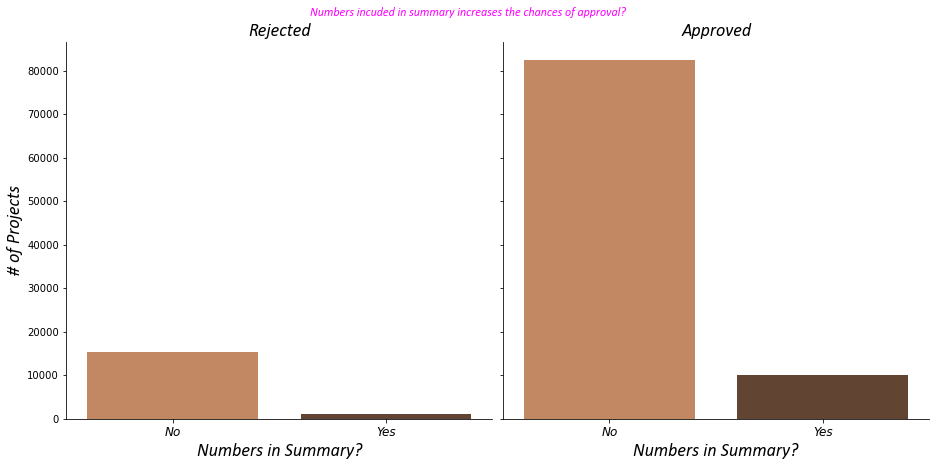

In [48]:
proj_smry = sns.catplot(data=res_sumry_nums,x='nums_in_res_summary',y='submissions',col='project_is_approved',
                         kind='bar',orient='v',palette='copper_r',aspect=1,height=6.5)
axes = proj_smry.axes.flatten()
axes[0].set_title("Rejected",fontdict=lbl_dict)
axes[0].set_xlabel("Numbers in Summary?",fontdict=lbl_dict)
axes[0].set_ylabel("# of Projects",fontdict=lbl_dict)
axes[1].set_title("Approved",fontdict=lbl_dict)
axes[1].set_xlabel("Numbers in Summary?",fontdict=lbl_dict)
axes[1].set_ylabel("",fontdict=lbl_dict)
proj_smry.fig.suptitle("Numbers incuded in summary increases the chances of approval?",fontdict=ttl_dict)
proj_smry.set_xticklabels(['No','Yes'],rotation=0,size=12,style='oblique')
plt.tight_layout(pad=0.7,h_pad=0.3)
plt.show()

In [49]:
res_sumry_nums

project_is_approved  nums_in_res_summary  submissions
0                    0                    0        15449
1                    0                    1         1093
2                    1                    0        82562
3                    1                    1        10144

### **Attribute-8**
- **`Project Title`**

In [50]:
proj_ttl_len = pd.DataFrame(dc_train_df['project_title'].str.split().apply(lambda row: len(row)).value_counts())\
                    .reset_index().rename(columns={'index':'title_lengths','project_title':'num_submissions'})\
                    .sort_values(by='num_submissions',ascending=False)

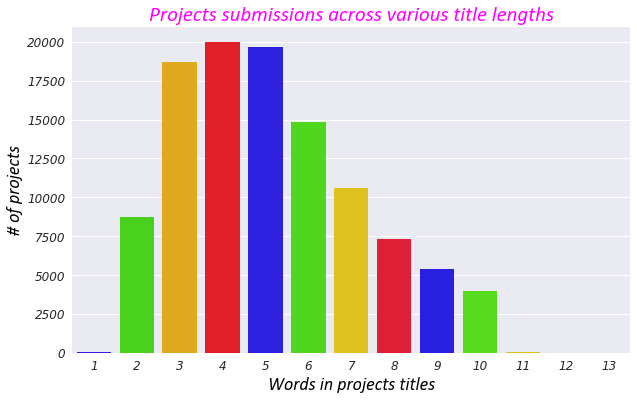

In [51]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,6))
    sns.barplot(x='title_lengths',y='num_submissions',data=proj_ttl_len,palette='prism')
    plt.xlabel('Words in projects titles',fontdict=lbl_dict)
    plt.ylabel('# of projects',fontdict=lbl_dict)
    plt.title('Projects submissions across various title lengths',fontdict=ttl_dict)
    plt.xticks(size=12,style='oblique')
    plt.yticks(size=12,style='oblique')

In [52]:
proj_ttl_len

title_lengths  num_submissions
0               4            19979
1               5            19677
2               3            18691
3               6            14824
4               7            10631
5               2             8733
6               8             7289
7               9             5383
8              10             3968
9               1               31
10             11               30
11             12               11
12             13                1

In [53]:
dc_train_df['proj_ttl_wrd_len'] = dc_train_df['project_title'].str.split().apply(lambda row: len(row))

In [54]:
proj_ttl_apprv_status = pd.DataFrame(dc_train_df.groupby(['project_is_approved','proj_ttl_wrd_len'])['id'].count()).\
                reset_index().rename(columns={'id':'submissions'})

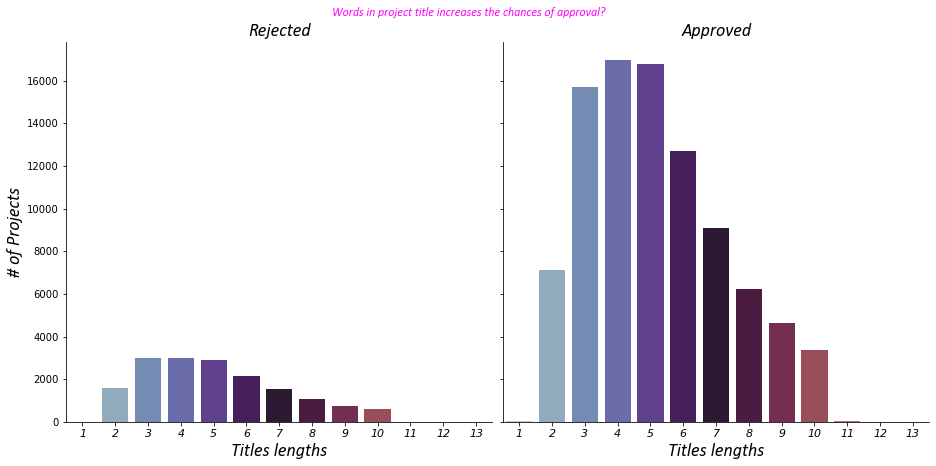

In [55]:
projs_ttls = sns.catplot(data=proj_ttl_apprv_status,x='proj_ttl_wrd_len',y='submissions',col='project_is_approved',
                         kind='bar',orient='v',palette='twilight',aspect=1,height=6.5)
axes = projs_ttls.axes.flatten()
axes[0].set_title("Rejected",fontdict=lbl_dict)
axes[0].set_xlabel("Titles lengths",fontdict=lbl_dict)
axes[0].set_ylabel("# of Projects",fontdict=lbl_dict)
axes[1].set_title("Approved",fontdict=lbl_dict)
axes[1].set_xlabel("Titles lengths",fontdict=lbl_dict)
axes[1].set_ylabel("",fontdict=lbl_dict)
projs_ttls.fig.suptitle("Words in project title increases the chances of approval?",fontdict=ttl_dict)
projs_ttls.set_xticklabels(rotation=0,size=11,style='oblique')
plt.tight_layout(pad=0.7,h_pad=0.3)
plt.show()

In [56]:
proj_ttl_apprv_status

project_is_approved  proj_ttl_wrd_len  submissions
0                     0                 1            4
1                     0                 2         1588
2                     0                 3         2978
3                     0                 4         2998
4                     0                 5         2893
5                     0                 6         2138
6                     0                 7         1538
7                     0                 8         1058
8                     0                 9          750
9                     0                10          592
10                    0                11            3
11                    0                12            2
12                    1                 1           27
13                    1                 2         7145
14                    1                 3        15713
15                    1                 4        16981
16                    1                 5        16784
17                    1                 6        12686
18                    1                 7         9093
19                    1                 8         6231
20                    1                 9         4633
21                    1                10         3376
22                    1                11           27
23                    1                12            9
24                    1                13            1

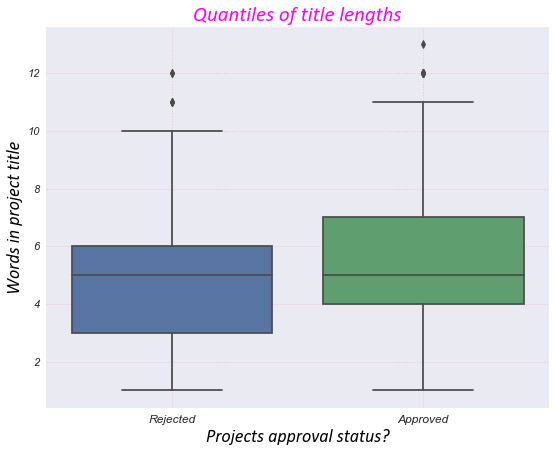

In [57]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(9,7))
    sns.boxplot(data=[dc_train_df[dc_train_df['project_is_approved']==0]['proj_ttl_wrd_len'].values,
                      dc_train_df[dc_train_df['project_is_approved']==1]['proj_ttl_wrd_len'].values])
    plt.xlabel("Projects approval status?",fontdict=lbl_dict)
    plt.xticks([0,1],('Rejected','Approved'),style='oblique',size=12)
    plt.ylabel('Words in project title',fontdict=lbl_dict)
    plt.yticks(style='oblique',size=11)
    plt.title('Quantiles of title lengths',fontdict=ttl_dict)
    plt.grid(which='major',linestyle=':',color='pink')
    plt.show()

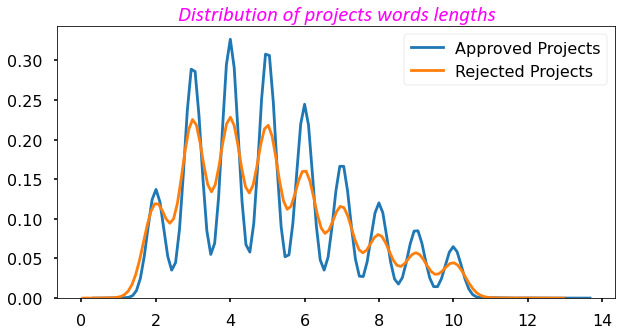

In [58]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(10,5))
    sns.distplot(dc_train_df[dc_train_df['project_is_approved']==1]['proj_ttl_wrd_len'].values,hist=False,label="Approved Projects")
    sns.distplot(dc_train_df[dc_train_df['project_is_approved']==0]['proj_ttl_wrd_len'].values,hist=False,label="Rejected Projects")
    plt.title("Distribution of projects words lengths",fontdict=ttl_dict)
    plt.show()

### **Attribute-9**
- **`Project Essay's`**

In [59]:
dc_train_df['essays'] = pd.DataFrame(dc_train_df["project_essay_1"].map(str) +\
                                     dc_train_df["project_essay_2"].map(str) +\
                                     dc_train_df["project_essay_3"].map(str) +\
                                     dc_train_df["project_essay_4"].map(str))

In [60]:
dc_train_df['essays'].iloc[0]

'My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\\r\\n\\r\\nBy providing these dvd\'s and players, st

In [61]:
proj_essay_len = pd.DataFrame(dc_train_df['essays'].str.split().apply(lambda row: len(row)).value_counts())\
                    .reset_index().rename(columns={'index':'essays_lengths','essays':'num_submissions'})\
                    .sort_values(by='num_submissions',ascending=False)

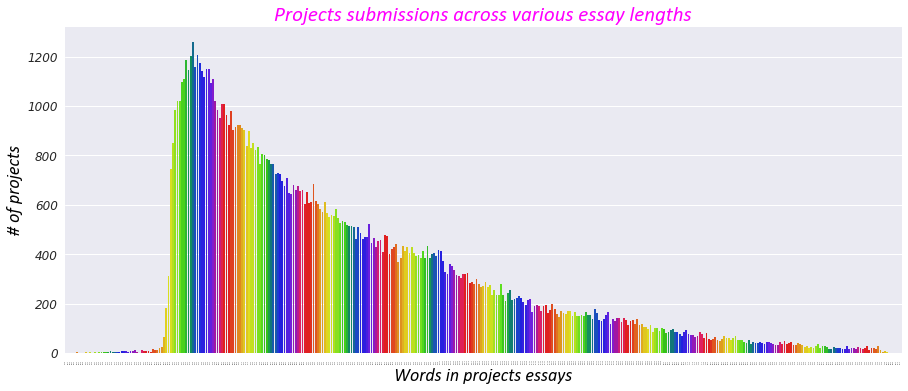

In [62]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,6))
    sns.barplot(x='essays_lengths',y='num_submissions',data=proj_essay_len,palette='prism')
    plt.xlabel('Words in projects essays',fontdict=lbl_dict)
    plt.ylabel('# of projects',fontdict=lbl_dict)
    plt.title('Projects submissions across various essay lengths',fontdict=ttl_dict)
    plt.xticks(size=2,style='oblique',rotation=90)
    plt.yticks(size=12,style='oblique')

In [63]:
dc_train_df['proj_essay_wrd_len'] = dc_train_df['essays'].str.split().apply(lambda row: len(row))

In [64]:
proj_essay_apprv_status = pd.DataFrame(dc_train_df.groupby(['project_is_approved','proj_essay_wrd_len'])['id'].count()).\
                reset_index().rename(columns={'id':'submissions'})

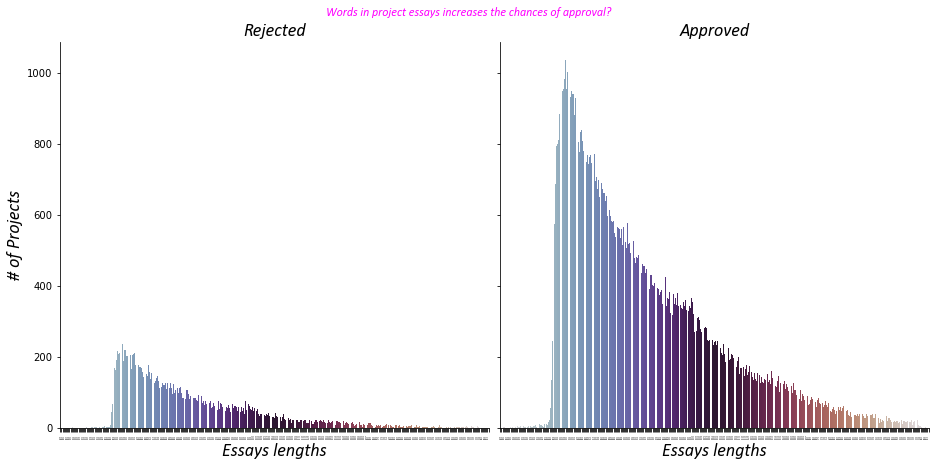

In [65]:
projs_essays = sns.catplot(data=proj_essay_apprv_status,x='proj_essay_wrd_len',y='submissions',col='project_is_approved',
                         kind='bar',orient='v',palette='twilight',aspect=1,height=6.5)
axes = projs_essays.axes.flatten()
axes[0].set_title("Rejected",fontdict=lbl_dict)
axes[0].set_xlabel("Essays lengths",fontdict=lbl_dict)
axes[0].set_ylabel("# of Projects",fontdict=lbl_dict)
axes[1].set_title("Approved",fontdict=lbl_dict)
axes[1].set_xlabel("Essays lengths",fontdict=lbl_dict)
axes[1].set_ylabel("",fontdict=lbl_dict)
projs_essays.fig.suptitle("Words in project essays increases the chances of approval?",fontdict=ttl_dict)
projs_essays.set_xticklabels(rotation=90,size=2,style='oblique')
plt.tight_layout(pad=0.7,h_pad=0.3)
plt.show()

In [66]:
proj_essay_apprv_status.sort_values(by='submissions',ascending=False)

project_is_approved  proj_essay_wrd_len  submissions
405                    1                 189         1037
407                    1                 191         1005
404                    1                 188          985
403                    1                 187          956
406                    1                 190          955
..                   ...                 ...          ...
337                    0                 485            1
329                    0                 477            1
327                    0                 474            1
325                    0                 472            1
722                    1                 514            1

[723 rows x 3 columns]

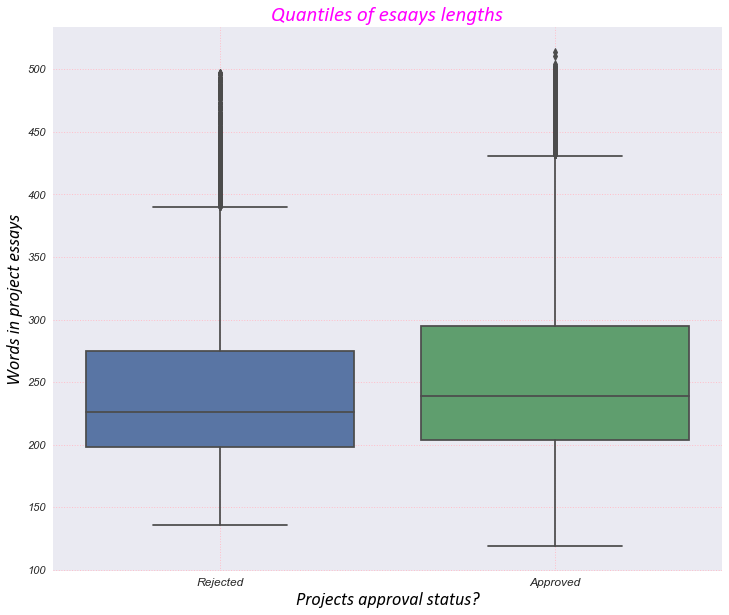

In [67]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,10))
    sns.boxplot(data=[dc_train_df[dc_train_df['project_is_approved']==0]['proj_essay_wrd_len'].values,
                      dc_train_df[dc_train_df['project_is_approved']==1]['proj_essay_wrd_len'].values])
    plt.xlabel("Projects approval status?",fontdict=lbl_dict)
    plt.xticks([0,1],('Rejected','Approved'),style='oblique',size=12)
    plt.ylabel('Words in project essays',fontdict=lbl_dict)
    plt.yticks(style='oblique',size=11)
    plt.title('Quantiles of esaays lengths',fontdict=ttl_dict)
    plt.grid(which='major',linestyle=':',color='pink')
    plt.show()

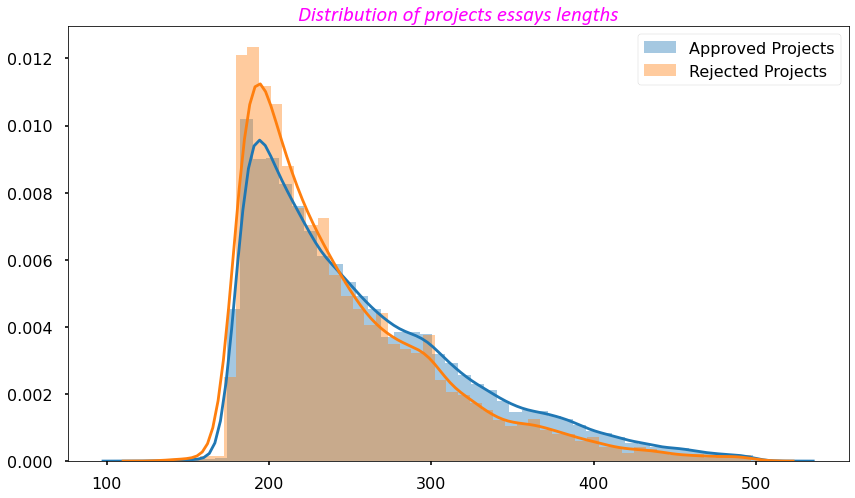

In [68]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(14,8))
    sns.distplot(dc_train_df[dc_train_df['project_is_approved']==1]['proj_essay_wrd_len'].values,hist=True,label="Approved Projects")
    sns.distplot(dc_train_df[dc_train_df['project_is_approved']==0]['proj_essay_wrd_len'].values,hist=True,label="Rejected Projects")
    plt.title("Distribution of projects essays lengths",fontdict=ttl_dict)
    plt.legend()

### **Attribute-10**
- **`Cost per project`**

In [69]:
dc_res_df.head(5)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [70]:
proj_tot_price_quantty = dc_res_df.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()\
                        .rename(columns={'price':'tot_price','quantity':'tot_quantity'})

proj_desc_res_df = pd.merge(dc_train_df, proj_tot_price_quantty, on='id', how='left')

In [71]:
apprv_projs_costs = proj_desc_res_df[proj_desc_res_df['project_is_approved']==1]['tot_price'].values
rej_projs_costs = proj_desc_res_df[proj_desc_res_df['project_is_approved']==0]['tot_price'].values

In [72]:
proj_desc_res_df.head(4)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   
2        2016-08-31 12:03:56             Grades 6-8   
3        2016-10-06 21:16:17          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   

   nums_in_res_summary  proj_ttl_wrd_len  \
0                    0                 7   
1                    0                 5   
2                    0                 7   
3                    0                 2   

                                              essays  proj_essay_wrd_len  \
0  My students are English learners that are work...                 272   
1  Our students arrive to our school eager to lea...                 221   
2  \r\n\"True champions aren't always the ones th...                 361   
3  I work at a unique school filled with both ESL...                 213   

   tot_price  tot_quantity  
0     154.60            23  
1     299.00             1  
2     516.85            22  
3     232.90             4

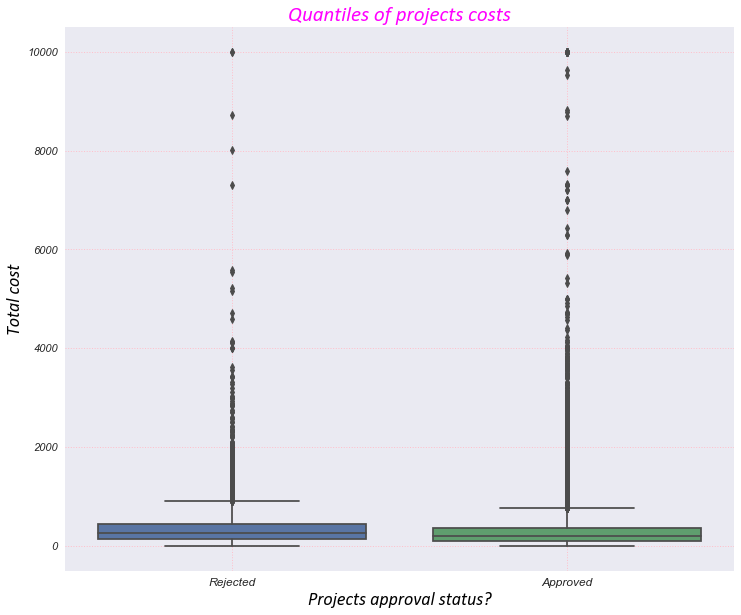

In [73]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,10))
    sns.boxplot(data=[rej_projs_costs,apprv_projs_costs])
    plt.xlabel("Projects approval status?",fontdict=lbl_dict)
    plt.xticks([0,1],('Rejected','Approved'),style='oblique',size=12)
    plt.ylabel('Total cost',fontdict=lbl_dict)
    plt.yticks(style='oblique',size=11)
    plt.title('Quantiles of projects costs',fontdict=ttl_dict)
    plt.grid(which='major',linestyle=':',color='pink')
    plt.show()

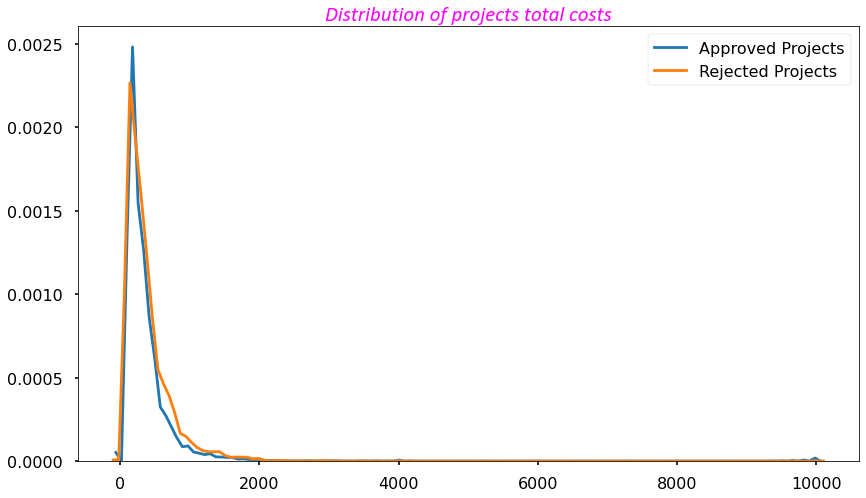

In [74]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(14,8))
    sns.distplot(apprv_projs_costs,hist=False,label="Approved Projects")
    sns.distplot(rej_projs_costs,hist=False,label="Rejected Projects")
    plt.title("Distribution of projects total costs",fontdict=ttl_dict)
    plt.legend()

In [75]:
x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(apprv_projs_costs,i), 3), np.round(np.percentile(rej_projs_costs,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       